# Edunet Foundation 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [4]:
df.info()
# checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.loc[df['diagnosis']=='M', 'benign_0__mal_1'] = 1
df.loc[df['diagnosis']=='B', 'benign_0__mal_1'] = 0
df.drop(columns='diagnosis',inplace=True)

In [6]:
df = df.drop(columns = ['id','Unnamed: 32'])

In [7]:
df.describe().transpose()
# check the statistical distributions of features and labels

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

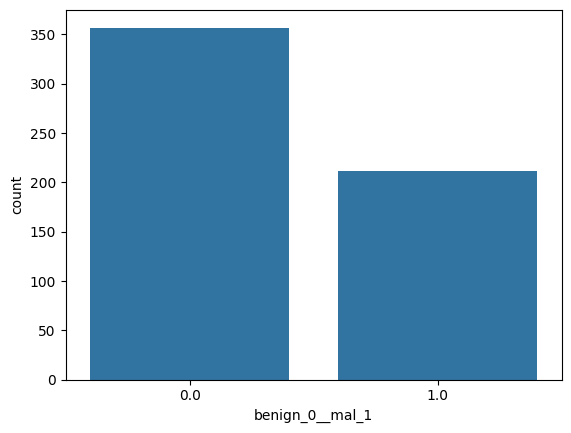

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

<Axes: >

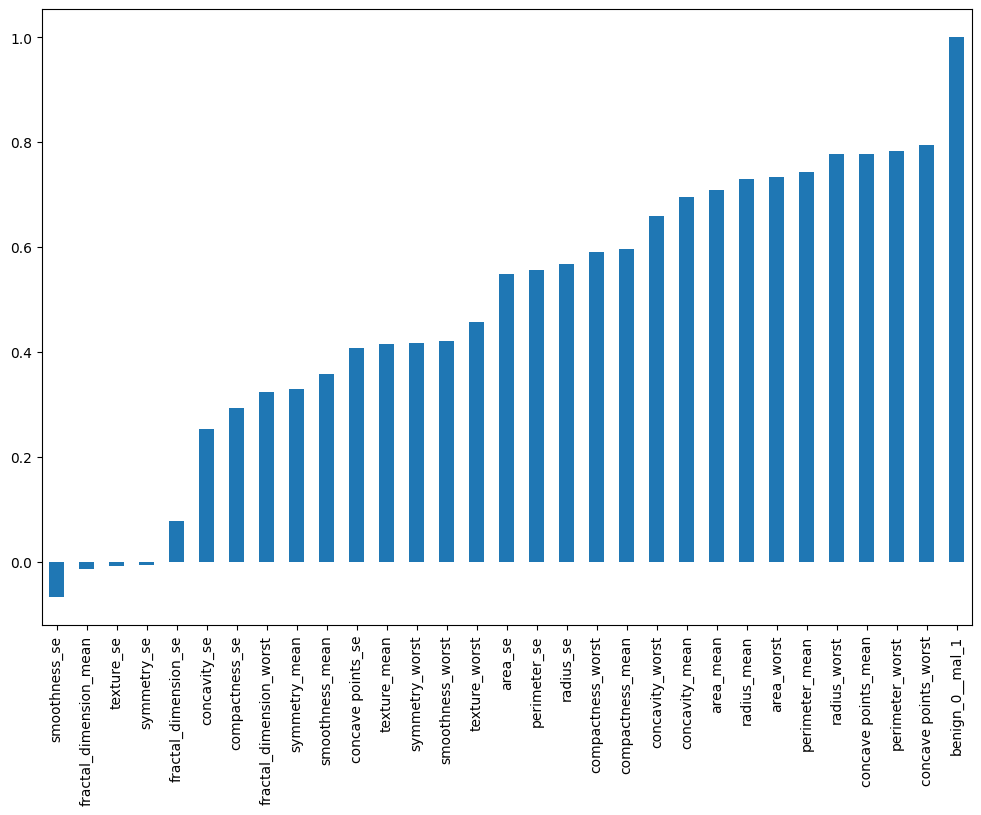

In [10]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

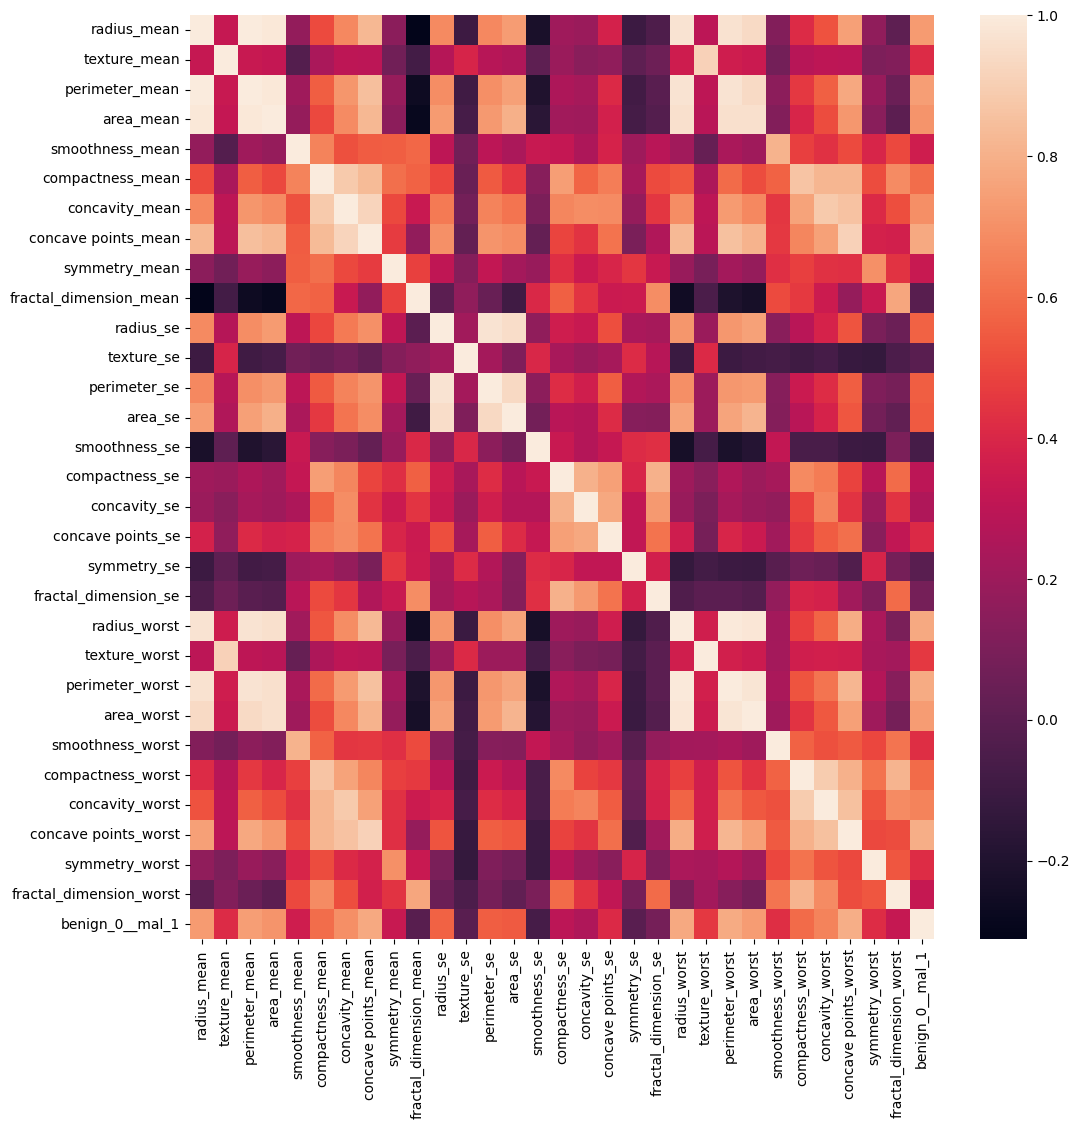

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [12]:
# Train Test Split

X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [15]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [5]:
# Creating the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [6]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# for binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600

14/14 [==============================] - 1s 17ms/step - loss: 0.6721 - val_loss: 0.6525
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6377 - val_loss: 0.6151
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5994 - val_loss: 0.5755
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5592 - val_loss: 0.5340
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5158 - val_loss: 0.4875
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4701 - val_loss: 0.4393
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4240 - val_loss: 0.3934
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3784 - val_loss: 0.3489
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3368 - val_loss: 0.3070
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2995 - val_loss: 0.2727
Epoch 1

14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.3215
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.3029
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.3005
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.3174
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.3069
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.2941
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.3724
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.2885
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.3737
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.2966
Epoc

In [22]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

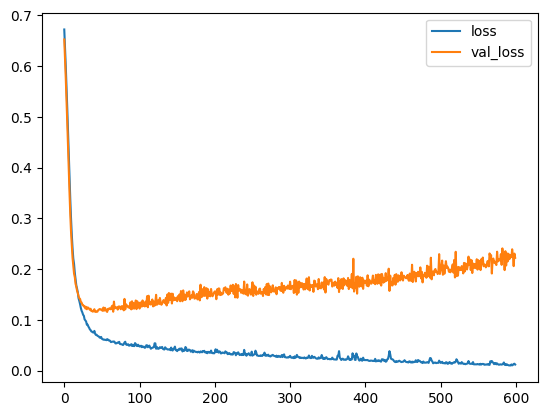

In [23]:
model_loss.plot()

In [24]:
# Early Stopping

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6706 - val_loss: 0.6625
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6395 - val_loss: 0.6311
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6021 - val_loss: 0.5933
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5595 - val_loss: 0.5500
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5138 - val_loss: 0.5023
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4663 - val_loss: 0.4515
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4179 - val_loss: 0.4028
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3736 - val_loss: 0.3589
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3355 - val_loss: 0.3189
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3030 - val_loss: 0.2859
Epoch 11

<Axes: >

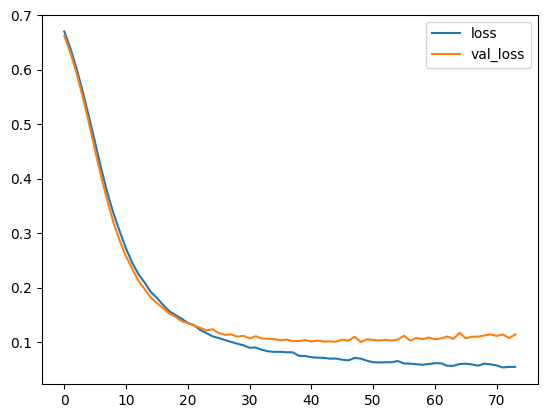

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
# Adding Dropout Layers

from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6880 - val_loss: 0.6725
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6613 - val_loss: 0.6610
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6520 - val_loss: 0.6393
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6368 - val_loss: 0.6120
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6108 - val_loss: 0.5807
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5956 - val_loss: 0.5476
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5597 - val_loss: 0.5180
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5551 - val_loss: 0.4891
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5111 - val_loss: 0.4590
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5006 - val_loss: 0.4287
Epoch 11

In [32]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

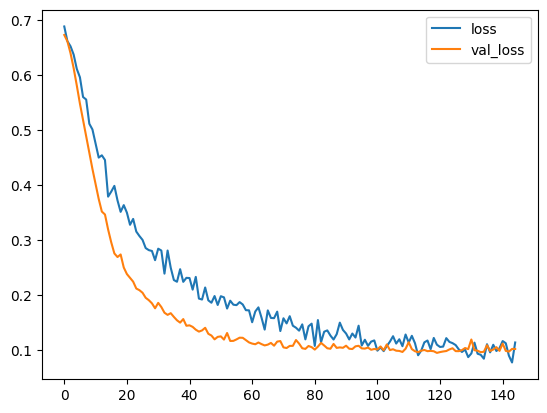

In [33]:
model_loss.plot()

In [51]:
# Model Evaluation

predictions = model.predict(X_test).round()

5/5 [==============================] - 0s 2ms/step


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        88
         1.0       0.96      0.98      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[86  2]
 [ 1 54]]
